In [1]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
fair_df = pd.read_csv('../fairness_df.csv', index_col = [0,1])
fair_df = fair_df.reset_index()
fair_df

,level_0,level_1,precision_range,max_parity_ratio,equalized_odds_diff,overall_accuracy,FPR,F1,recall_range,brier_score_range
0,Adult Data Set (Census),logistic_regression,1.0,0.193293,0.309381,0.784916,0.059801,0.472561,0.309381,0.007300
1,Adult Data Set (Census),naive_bayes,1.0,0.144511,0.321357,0.797936,0.046440,0.486405,0.321357,0.607533
2,Adult Data Set (Census),nearest_neighbors,1.0,0.254550,0.316866,0.771035,0.080658,0.481243,0.316866,0.413616
3,Adult Data Set (Census),decision_tree,1.0,0.214157,0.629242,0.807149,0.134756,0.772435,0.629242,0.236002
4,Adult Data Set (Census),random_forest,1.0,0.117221,0.642216,0.855177,0.075281,0.782133,0.642216,0.181923
5,Adult Data Set (Census),multilayer_perceptron,1.0,0.979469,NaN,0.261639,NaN,1.000000,1.000000,0.975044
6,Adult Data Set (Census),svm_model,1.0,0.107879,0.560379,0.846211,0.060453,0.718260,0.560379,0.249568
7,Communities and Crime,logistic_regression,1.0,0.309569,0.446541,0.729459,0.138235,0.617391,0.446541,0.055279
8,Communities and Crime,naive_bayes,1.0,0.082526,0.427673,0.793587,0.035294,0.599119,0.427673,0.510916
9,Communities and Crime,nearest_neighbors,1.0,0.236783,0.496855,0.759519,0.117647,0.663866,0.496855,0.242868


In [3]:
ranked = []
for dataset in np.unique(fair_df['level_0']):
    data_df = fair_df[fair_df['level_0'] == dataset]
    data_ranked = data_df.rank(numeric_only=True)
    
    # metrics where higher = better
    data_ranked['overall_accuracy'] = max(data_ranked['overall_accuracy']) - data_ranked['overall_accuracy'] + 1
    data_ranked['max_parity_ratio'] = max(data_ranked['max_parity_ratio']) - data_ranked['max_parity_ratio'] + 1
    
    ranked.append(pd.concat([data_df[['level_0', 'level_1']], data_ranked], axis = 1))

Adult Data Set (Census)


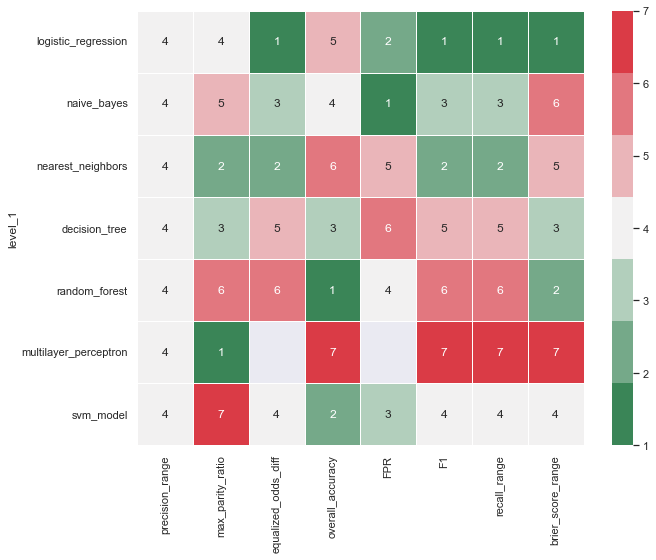

Communities and Crime


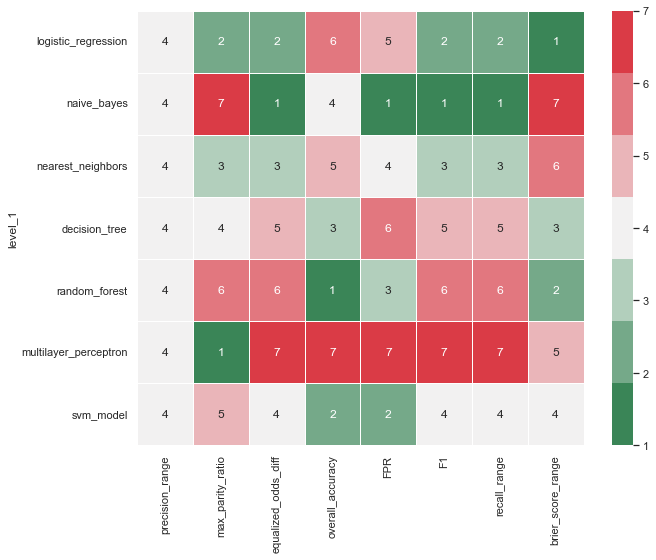

Diabetes Dataset 1999-2008


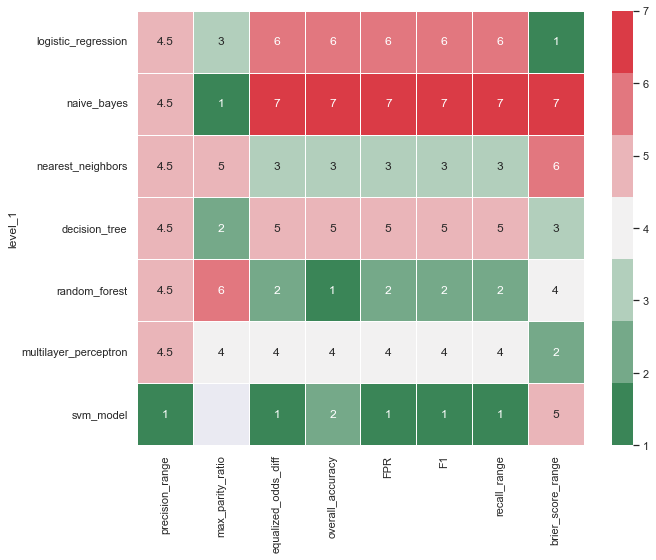

Loans Default Dataset


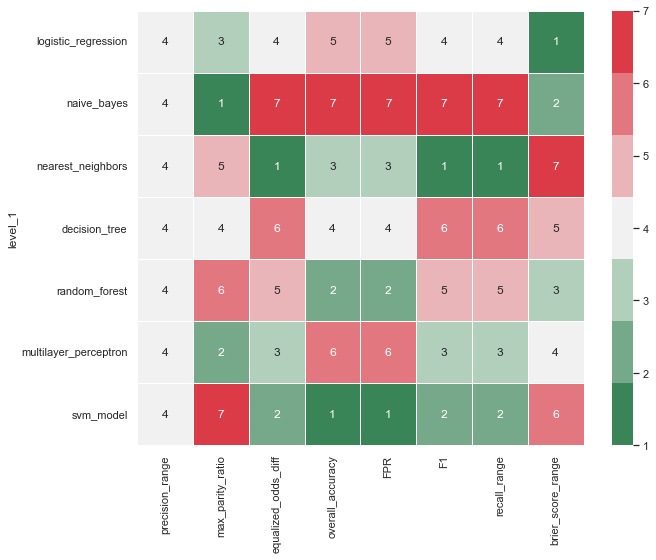

Obermeyer Health Dataset


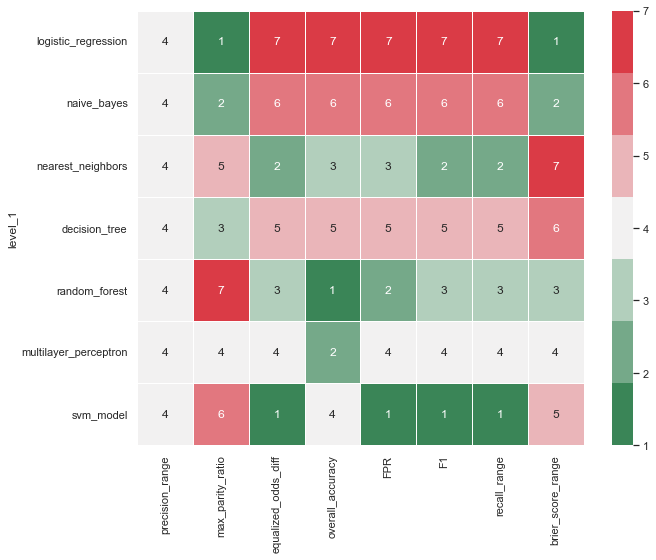

In [4]:
# Visualize ranks
for rank_df in ranked:
    dataset = rank_df['level_0'].iloc[0]
    rank_df = rank_df.drop(columns = ['level_0']).set_index('level_1')
    seaborn.set(rc = {'figure.figsize':(10,8)})
    seaborn.heatmap(rank_df, annot = True, linewidths = 0.5, cmap = seaborn.diverging_palette(140, 10, n = 7))
    print(dataset)
    plt.show()

In [5]:
# Average model rank within a dataset across metrics
for rank_df in ranked:
    dataset = rank_df['level_0'].iloc[0]
    rank_df = rank_df.drop(columns = ['level_0']).set_index('level_1')
    print('\n\n', dataset)
    print(rank_df.mean(axis = 1))



 Adult Data Set (Census)
level_1
logistic_regression      2.375
naive_bayes              3.625
nearest_neighbors        3.500
decision_tree            4.250
random_forest            4.375
multilayer_perceptron    5.500
svm_model                4.000
dtype: float64


 Communities and Crime
level_1
logistic_regression      3.000
naive_bayes              3.250
nearest_neighbors        3.875
decision_tree            4.375
random_forest            4.250
multilayer_perceptron    5.625
svm_model                3.625
dtype: float64


 Diabetes Dataset 1999-2008
level_1
logistic_regression      4.812500
naive_bayes              5.937500
nearest_neighbors        3.812500
decision_tree            4.312500
random_forest            2.937500
multilayer_perceptron    3.812500
svm_model                1.714286
dtype: float64


 Loans Default Dataset
level_1
logistic_regression      3.750
naive_bayes              5.250
nearest_neighbors        3.125
decision_tree            4.875
random_forest       

In [6]:
# for each model, average of average metric ranks across datasets
full_rank_df = pd.concat(ranked, axis = 0)
full_rank_df.groupby(['level_1']).mean().mean(axis = 1)

level_1
decision_tree            4.51250
logistic_regression      3.81250
multilayer_perceptron    4.48125
naive_bayes              4.56250
nearest_neighbors        3.56250
random_forest            3.76250
svm_model                3.18125
dtype: float64

<AxesSubplot:>

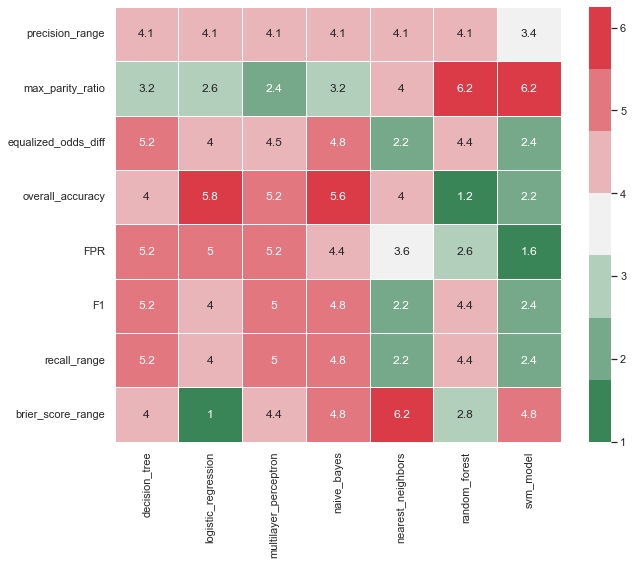

In [28]:
model_mean_ranks = {}
for model in np.unique(full_rank_df['level_1']):
    subset = full_rank_df[full_rank_df['level_1'] == model]
    model_mean_ranks[model] = (subset.drop(columns = ['level_0', 'level_1']).apply(np.mean).to_dict())
pd.DataFrame(model_mean_ranks)
seaborn.heatmap(pd.DataFrame(model_mean_ranks), cmap = seaborn.diverging_palette(140, 10, n = 7), annot = True, linewidths = 0.5)

<AxesSubplot:>

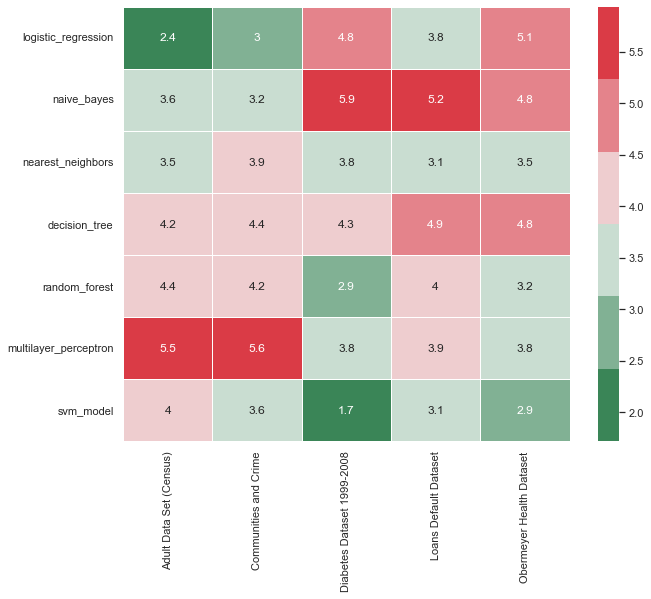

In [29]:
dataset_model_ranks = {}
for dataset in np.unique(full_rank_df['level_0']):
    subset = full_rank_df[full_rank_df['level_0'] == dataset]
    dataset_model_ranks[dataset] = subset.drop(columns = ['level_0']).set_index('level_1', drop = True).mean(axis = 1).to_dict()
seaborn.heatmap(pd.DataFrame(dataset_model_ranks), cmap = seaborn.diverging_palette(140, 10), annot = True, linewidths = 0.5)

<AxesSubplot:>

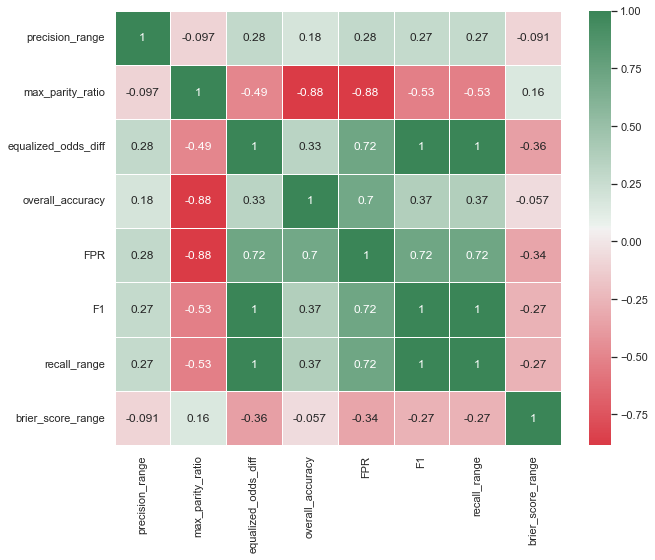

In [30]:
seaborn.heatmap(full_rank_df.drop(columns = ['level_0', 'level_1']).corr(), cmap = seaborn.diverging_palette(10, 140, n = 1000), annot = True, linewidths = 0.5)

In [23]:
full_rank_df

,level_0,level_1,precision_range,max_parity_ratio,equalized_odds_diff,overall_accuracy,FPR,F1,recall_range,brier_score_range
0,Adult Data Set (Census),logistic_regression,4.0,4.0,1.0,5.0,2.0,1.0,1.0,1.0
1,Adult Data Set (Census),naive_bayes,4.0,5.0,3.0,4.0,1.0,3.0,3.0,6.0
2,Adult Data Set (Census),nearest_neighbors,4.0,2.0,2.0,6.0,5.0,2.0,2.0,5.0
3,Adult Data Set (Census),decision_tree,4.0,3.0,5.0,3.0,6.0,5.0,5.0,3.0
4,Adult Data Set (Census),random_forest,4.0,6.0,6.0,1.0,4.0,6.0,6.0,2.0
5,Adult Data Set (Census),multilayer_perceptron,4.0,1.0,NaN,7.0,NaN,7.0,7.0,7.0
6,Adult Data Set (Census),svm_model,4.0,7.0,4.0,2.0,3.0,4.0,4.0,4.0
7,Communities and Crime,logistic_regression,4.0,2.0,2.0,6.0,5.0,2.0,2.0,1.0
8,Communities and Crime,naive_bayes,4.0,7.0,1.0,4.0,1.0,1.0,1.0,7.0
9,Communities and Crime,nearest_neighbors,4.0,3.0,3.0,5.0,4.0,3.0,3.0,6.0
